In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
ds = pd.read_csv('train.csv')

In [4]:
ds.head()

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160


In [9]:
ds['is_anomaly']=ds['is_anomaly'].replace(False,0).replace(True,1)

In [10]:
X = ds[['timestamp', 'value', 'predicted']]

In [24]:
y = ds['is_anomaly']

In [25]:
y.shape

(15830,)

In [26]:
y

0        0
1        0
2        0
3        0
4        0
        ..
15825    0
15826    0
15827    0
15828    0
15829    0
Name: is_anomaly, Length: 15830, dtype: int64

In [27]:
corr=ds.corr()


<AxesSubplot:>

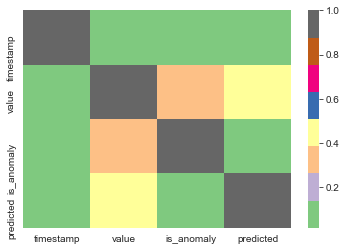

In [28]:
sns.heatmap(corr, 
            xticklabels=ds.corr().columns.values,
            yticklabels=ds.corr().columns.values,
            cmap='Accent'
           )

<AxesSubplot:xlabel='predicted', ylabel='value'>

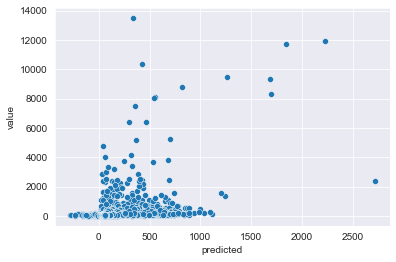

In [29]:
sns.set_style("darkgrid")
sns.scatterplot(x=ds['predicted'], y=ds['value'])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=49)

In [35]:
X_train.shape

(11872, 3)

In [36]:
y_train.shape

(11872,)

In [37]:
model = LogisticRegression()

In [38]:
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred = model.predict(X_test)

In [40]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
y_test

13387    0
2880     0
5043     0
15431    0
5532     0
        ..
2094     0
8813     0
10880    0
7441     0
10527    0
Name: is_anomaly, Length: 3958, dtype: int64

In [44]:
accuracy_score(y_pred, y_test)

0.9477008590197069